# Evaluating Specificity with WordNet Hierarchies

In [1]:
# load cleaned responses from the data folder for kamala kamala_responses_cleaned.txt
with open('../data/kamala_responses_cleaned.txt', 'r') as file:
    CLN_kamala_responses = file.read()

# load cleaned responses from the data folder for trump_responses_cleaned.txt
with open('../data/trump_responses_cleaned.txt', 'r') as file:
    CLN_trump_responses = file.read()

# For CLN_kamala_responses and CLN_trump_responses break
# the responses at the \n character to get individual sentences

CLN_kamala_responses = CLN_kamala_responses.split("\n")
CLN_trump_responses = CLN_trump_responses.split("\n")

In [2]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')

# Function to get word specificity using first synset and filtering content words only
def get_word_specificity(word):
    synsets = wn.synsets(word)
    if not synsets:
        return None  # Exclude word if not found in WordNet
    return synsets[0].max_depth()  # Use the first synset for disambiguation

# Function to check if a word is a content word (noun, verb, adj, adv)
def is_content_word(word, pos_tag):
    content_pos_tags = ['NN', 'VB', 'JJ', 'RB']  # Nouns, verbs, adjectives, adverbs
    return pos_tag in content_pos_tags

# Process each response: tokenization, POS tagging, and filtering content words
def calculate_specificity_for_responses(responses):
    stop_words = set(stopwords.words('english'))
    response_specificity = {}

    for response in responses:
        tokens = word_tokenize(response)
        tagged_tokens = pos_tag(tokens)
        specificities = []

        for word, pos in tagged_tokens:
            word_lower = word.lower()
            if word_lower not in stop_words and is_content_word(word_lower, pos):
                specificity = get_word_specificity(word_lower)
                if specificity is not None:  # Exclude words not found in WordNet
                    specificities.append(specificity)
        
        response_specificity[response] = specificities

    return response_specificity

# Function to calculate the average specificity of each response
def calculate_average_specificity(responses):
    return {response: (sum(specificities) / len(specificities)) if specificities else 0 
            for response, specificities in responses.items()}

# Calculate specificity for Trump's and Harris' responses
trumps_specificity = calculate_specificity_for_responses(CLN_trump_responses)
harris_specificity = calculate_specificity_for_responses(CLN_kamala_responses)

# Calculate the average specificity for Trump's and Harris' responses
trumps_avg_specificity = calculate_average_specificity(trumps_specificity)
harris_avg_specificity = calculate_average_specificity(harris_specificity)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /mounts/Users/cisintern/pwicke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [4]:
print(trumps_specificity)
print(trumps_avg_specificity)

print(flatten(trumps_specificity.values()))
T_vec = flatten(trumps_specificity.values())
print()

print(harris_specificity)
print(harris_avg_specificity)

print(flatten(harris_specificity.values()))
H_vec = flatten(harris_specificity.values())
print()

{'nice see fun': [9, 8, 7], 'thank': [7], 'first sale tax incorrect statement know tariff country country go finally year pay back world tariff substantial case take billion billion dollar know China fact never take tariff much money would totally destroy everything set take billion dollar China place leave tariff tariff yet inflation look terrible economy inflation really know country buster break country inflation like people ever see probably bad nation history generous many thing high year ago disaster people middle class every class top million people pour country prison jail mental institution insane asylum come take job occupy right African Americans Hispanics also union union go affect soon see happen see happen town throughout United States look Springfield Ohio look Aurora Colorado take town take building go violently people Biden let country destroy country dangerous high level criminality get get fast create one great economy history country even well': [6, 9, 7, 0, 4, 9, 7

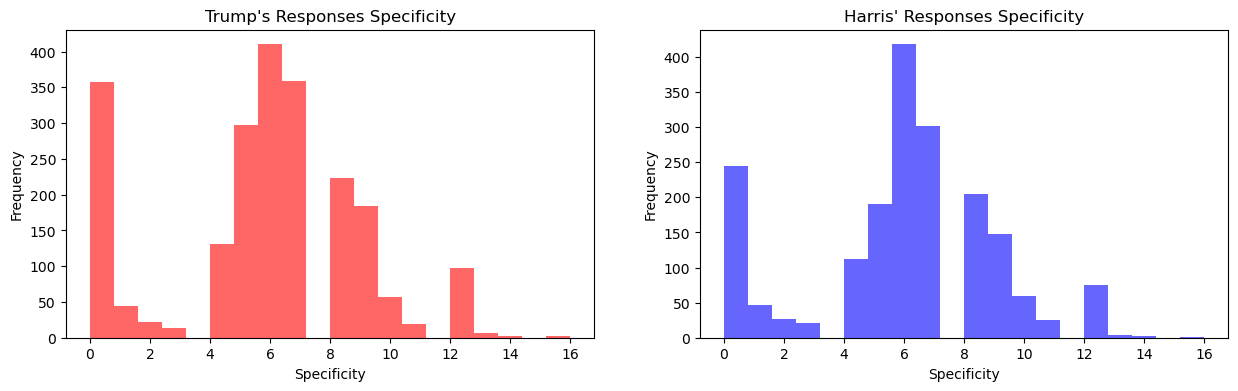

In [5]:
# Retrieve all specificities for Trump's and Harris' responses form the trumps_specificity and harris_specificity dictionaries
trumps_specificities = [specificity for specificities in trumps_specificity.values() for specificity in specificities]
harris_specificities = [specificity for specificities in harris_specificity.values() for specificity in specificities]

# Plot the histogram of specificities for Trump's and Harris' responses
# Use Red for Trump and Blue for Harris
# Both plots should be in two subplots in the same figure
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].hist(trumps_specificities, bins=20, alpha=.6, color='red')
axs[0].set_title("Trump's Responses Specificity")
axs[0].set_xlabel("Specificity")
axs[0].set_ylabel("Frequency")
axs[1].hist(harris_specificities, bins=20, alpha=.6, color='blue')
axs[1].set_title("Harris' Responses Specificity")
axs[1].set_xlabel("Specificity")
axs[1].set_ylabel("Frequency")
plt.show()

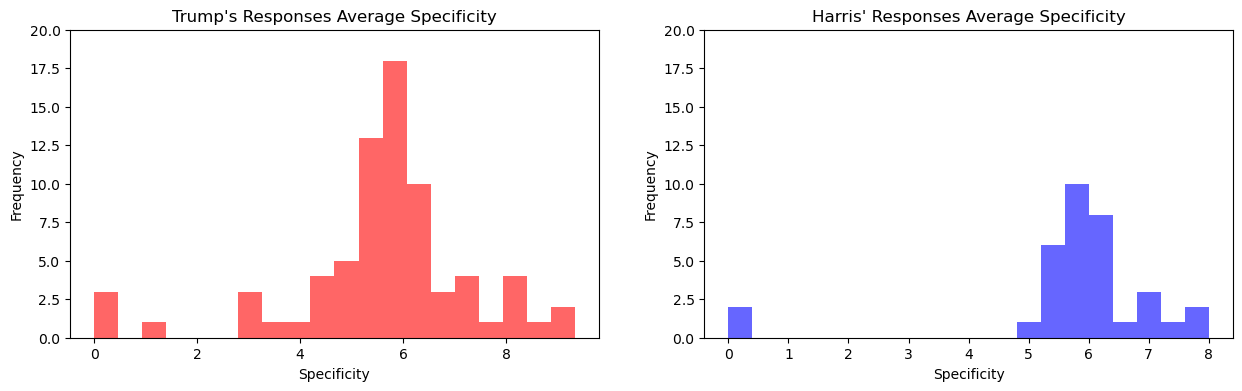

In [6]:
# Do the same for the average specificities
# Plot the histogram of average specificities for Trump's and Harris' responses
# Use Red for Trump and Blue for Harris
# Both plots should be in two subplots in the same figure
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].hist(trumps_avg_specificity.values(), bins=20, alpha=.6, color='red')
axs[0].set_title("Trump's Responses Average Specificity")
axs[0].set_xlabel("Specificity")
axs[0].set_ylabel("Frequency")
axs[0].set_ylim(0, 20)
axs[1].hist(harris_avg_specificity.values(), bins=20, alpha=.6, color='blue')
axs[1].set_title("Harris' Responses Average Specificity")
axs[1].set_xlabel("Specificity")
axs[1].set_ylabel("Frequency")
axs[1].set_ylim(0, 20)
# Store the figure in the data folder as histogram_avg_specificity.png with 300 dpi
plt.savefig('../figures/histogram_avg_specificity.png', dpi=300)
plt.show()


In [7]:
# Do a statistical test to determine if the distributions of specificities for Trump's and Harris' responses are significantly different
# First, do a Shapiro-Wilk test to check for normality
from scipy.stats import shapiro

trumps_specificities = [specificity for specificities in trumps_specificity.values() for specificity in specificities]
harris_specificities = [specificity for specificities in harris_specificity.values() for specificity in specificities]

_, trumps_p_value = shapiro(trumps_specificities)
_, harris_p_value = shapiro(harris_specificities)

print(f"Shapiro-Wilk p-value for Trump's responses: {trumps_p_value}")
print(f"Shapiro-Wilk p-value for Harris' responses: {harris_p_value}")

Shapiro-Wilk p-value for Trump's responses: 3.267042307381779e-32
Shapiro-Wilk p-value for Harris' responses: 2.902029489659157e-29


In [8]:
# Shapiro-Wilk p-value for Trump's responses: 3.267042307381779e-32
# Shapiro-Wilk p-value for Harris' responses: 2.902029489659157e-29

# Since the p-values are less than 0.05, the distributions are not normal
# The Kologorov-Smirnov test is used to compare the distributions

from scipy.stats import ks_2samp

_, ks_p_value = ks_2samp(trumps_specificities, harris_specificities)
print(f"Kolmogorov-Smirnov p-value: {ks_p_value}")

Kolmogorov-Smirnov p-value: 0.015937254187676


In [9]:
# Since Trump has more responses than Harris, we need to normalize the number of responses
# to compare the distributions
import numpy as np

trumps_specificities = np.random.choice(trumps_specificities, len(harris_specificities))

_, ks_p_value = ks_2samp(trumps_specificities, harris_specificities)
print(f"Kolmogorov-Smirnov p-value: {ks_p_value}")


Kolmogorov-Smirnov p-value: 0.00978312255071388


In [10]:
import numpy as np
import scipy.stats as stats

# Sample vectors
T_vec = np.array([9, 8, 7, 7, 6, 9, 7, 0, 4, 9])  # Replace with your actual data
H_vec = np.array([6, 6, 7, 7, 6, 4, 8, 0, 6, 5, 6, 6, 4, 6, 6, 6, 8, 8, 0, 5, 9])  # Replace with your actual data

# Step 1: Check for normality
shapiro_T = stats.shapiro(T_vec)
shapiro_H = stats.shapiro(H_vec)

print(f"Shapiro-Wilk Test for T_vec: Statistic={shapiro_T.statistic}, p-value={shapiro_T.pvalue}")
print(f"Shapiro-Wilk Test for H_vec: Statistic={shapiro_H.statistic}, p-value={shapiro_H.pvalue}")

# Step 2: Decision based on p-value
alpha = 0.05
normal_T = shapiro_T.pvalue > alpha
normal_H = shapiro_H.pvalue > alpha

if normal_T and normal_H:
    # If both are normally distributed, use t-test
    t_stat, p_value = stats.ttest_ind(T_vec, H_vec, equal_var=False)  # Welch's t-test
    test_type = "t-test"
else:
    # Otherwise, use ks-test
    u_stat, p_value = stats.ks_2samp(T_vec, H_vec)
    test_type = "Kolmogorov-Smirnov test"
    

print(f"{test_type}: Statistic={t_stat if test_type == 't-test' else u_stat}, p-value={p_value}")

# Step 3: Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: The distributions differ.")
else:
    print("Fail to reject the null hypothesis: The distributions do not differ.")


Shapiro-Wilk Test for T_vec: Statistic=0.8148763904553177, p-value=0.021970220719203827
Shapiro-Wilk Test for H_vec: Statistic=0.8319155307147077, p-value=0.0021058932082294803
Kolmogorov-Smirnov test: Statistic=0.4142857142857143, p-value=0.1494952501191317
Fail to reject the null hypothesis: The distributions do not differ.
